In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append('../../pyscan')
sys.path.append('./compressive')

import pyscan as ps

from random import random, choices
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from time import sleep

Could not load Keysight SD1
Could not load Keysight SD1
Basler Camera software not found, BaserCamera not loaded
Helios Camera not installed
msl not installed, Thorlabs BSC203 driver not loaded
seabreeze module not found, Ocean Optics not imported
Failed to load spinapi library.
spinapi is not installed, PulseBlaster driver not loaded.
Thorlabs Kinesis not found, ThorlabsBSC203 not loaded
Thorlabs Kinesis not found, ThorlabsBSC303 not loaded
Thorlabs Kinesis not found, ThorlabsMFF101 not loaded


In [3]:
# Make a measure function

def generate_multiD_data(expt):
    """
    Generates fake data proportinal to loopX.i
    x1 - 0D data (point)
    x2 - 1D data (line/array)
    x3 - 2D data (2D array)
    """
     
    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    v = runinfo.loop0.i + runinfo.loop1.i*runinfo.loop0.n + \
           runinfo.loop2.i*runinfo.loop0.n*runinfo.loop1.n + \
           runinfo.loop3.i*runinfo.loop0.n*runinfo.loop1.n*runinfo.loop2.n
    
    d.x1 = v
    d.x2 = [v for i in range(5)]
    d.x3 = [[v for i in range(5)] for j in range(5)]
    
    # this line after your measured items
    
    return d

In [4]:
# Setup as usual
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage()
devices.v2 = ps.TestVoltage()
devices.v3 = ps.TestVoltage()


In [5]:
# 1D data
runinfo = ps.RunInfo()
runinfo.loop0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.1)

runinfo.measure_function = generate_multiD_data

expt = ps.Sweep(runinfo, devices, time=True)
expt.run()


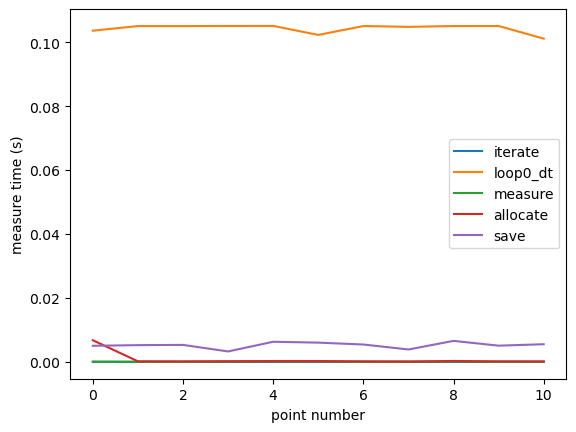

In [6]:
# Time data acquisition

plt.plot(expt.runinfo.dt1)
plt.plot(expt.runinfo.dt2)
plt.plot(expt.runinfo.dt3)
plt.plot(expt.runinfo.dt4)
plt.plot(expt.runinfo.dt5)

plt.legend(['iterate', 'loop0_dt', 'measure', 'allocate', 'save'])


plt.xlabel('point number')
plt.ylabel('measure time (s)')
plt.show()


In [7]:
print('{} s avg. property iteration time'.format(np.mean(expt.runinfo.dt1)))
print('{} s avg. loop0 wait time'.format(np.mean(expt.runinfo.dt2)))
print('{} s avg. measure time'.format(np.mean(expt.runinfo.dt3)))
print('{} s avg. data allocation time'.format(np.mean(expt.runinfo.dt4)))
print('{} s avg. data save time'.format(np.mean(expt.runinfo.dt5)))

2.2628090598366477e-05 s avg. property iteration time
0.10428801449862393 s avg. loop0 wait time
0.00010100277987393466 s avg. measure time
0.000810883261940696 s avg. data allocation time
0.005266666412353516 s avg. data save time


In [8]:
# 2D data
runinfo = ps.RunInfo()
runinfo.loop0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.1)
runinfo.loop1 = ps.PropertyScan({'v2': ps.drange(0, 0.2, 1)}, prop='voltage', dt=0.1)

runinfo.measure_function = generate_multiD_data

# This is the only important difference
expt = ps.Sweep(runinfo, devices, time=True)
expt.run()


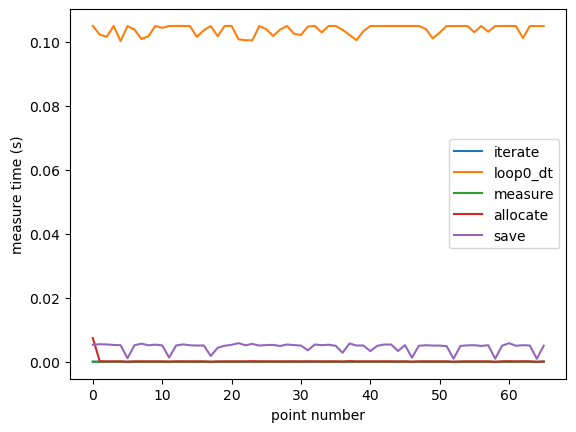

In [9]:
# Time data acquisition

plt.plot(expt.runinfo.dt1.flatten())
plt.plot(expt.runinfo.dt2.flatten())
plt.plot(expt.runinfo.dt3.flatten())
plt.plot(expt.runinfo.dt4.flatten())
plt.plot(expt.runinfo.dt5.flatten())

plt.legend(['iterate', 'loop0_dt', 'measure', 'allocate', 'save'])

plt.xlabel('point number')
plt.ylabel('measure time (s)')

plt.show()



In [10]:
print('{} s avg. property iteration time'.format(np.mean(expt.runinfo.dt1)))
print('{} s avg. loop0 wait time'.format(np.mean(expt.runinfo.dt2)))
print('{} s avg. measure time'.format(np.mean(expt.runinfo.dt3)))
print('{} s avg. data allocation time'.format(np.mean(expt.runinfo.dt4)))
print('{} s avg. data save time'.format(np.mean(expt.runinfo.dt5)))

1.983931570342093e-05 s avg. property iteration time
0.10385778456023245 s avg. loop0 wait time
6.698478351939808e-05 s avg. measure time
0.0002707568081942472 s avg. data allocation time
0.004708763324853146 s avg. data save time


In [2]:
ps.drange(1,1,2.5)


[1.0, 2.0, 2.5]